In [1]:
import re
import pickle
import os
import collections

from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic') 

In [2]:
df=pd.read_csv('_preprocessed_2_/news_total.csv',index_col=0)

In [3]:
news_brands=[i.split('_')[0] for i in df.loc[:,[i for i in df.columns if i.split('_')[-1]=='1']].columns]
_df=df.loc[:,[i for i in df.columns if i.split('_')[-1]=='1']]
_df.columns = news_brands
counter_news_brand = _df.count().to_dict()

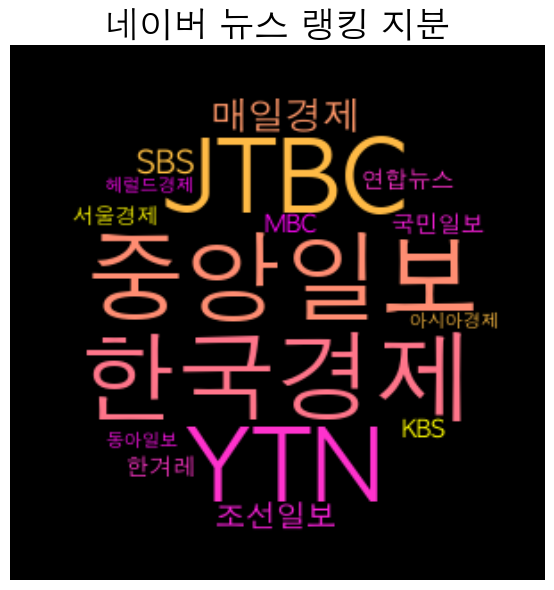

In [4]:
tags = collections.Counter(counter_news_brand)
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="black",
               repeat=False,
               mask=mask, 
               min_font_size=10,
               prefer_horizontal=True,
               colormap = 'spring',
               font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf")


wc.generate_from_frequencies(dict(tags.most_common(35)))
plt.figure(figsize=(12,6),dpi=100)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title("네이버 뉴스 랭킹 지분",fontsize=25,fontweight='bold')
plt.tight_layout()
plt.show()

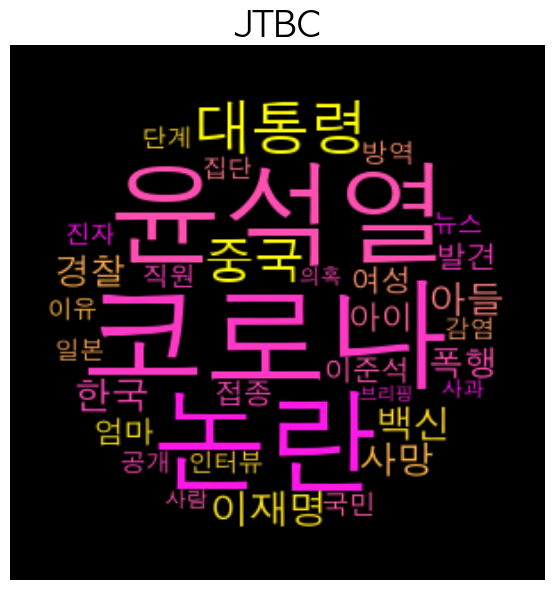

In [64]:
content_array=df.loc[:,[i for i in df.columns if i.startswith(news_brands[0])]].fillna('').to_numpy()
content_str=''.join(list(content_array.reshape(-1)))

text = content_str
okt = Okt()
# okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = okt.pos(text) 

noun_list = []


# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun']: 
        noun_list.append(word)


# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_list)
tags = counts.most_common() 
tags = [i for i in tags if len(i[0])!=1 if i[0] not in ['단독','영상']]
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="black",
               repeat=False,
               mask=mask, 
               min_font_size=10,
               prefer_horizontal=True,
               colormap = 'spring',
               font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf")


wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,6),dpi=100)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"{news_brands[0]}",fontsize=25,fontweight='bold')
plt.tight_layout()
plt.show()

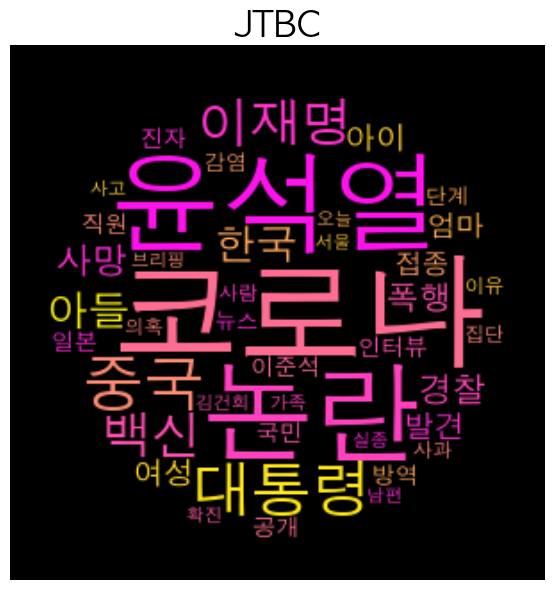

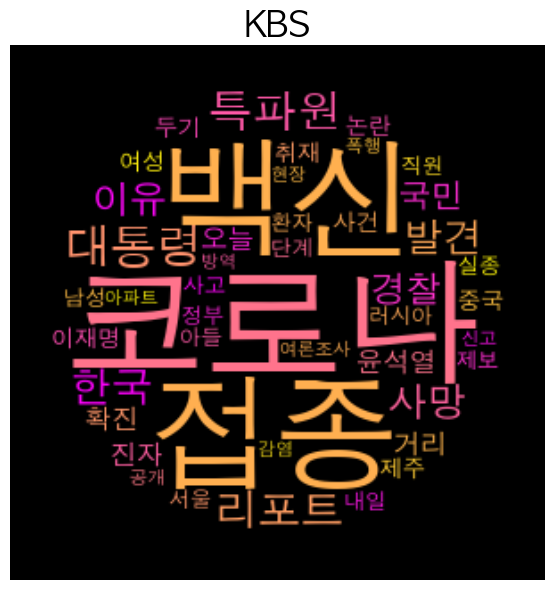

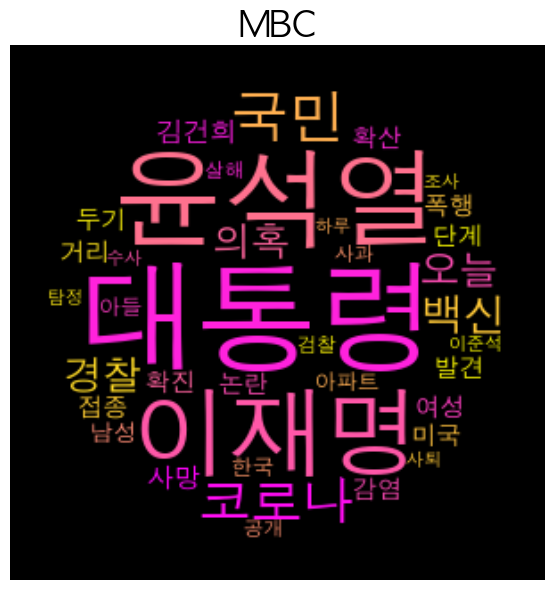

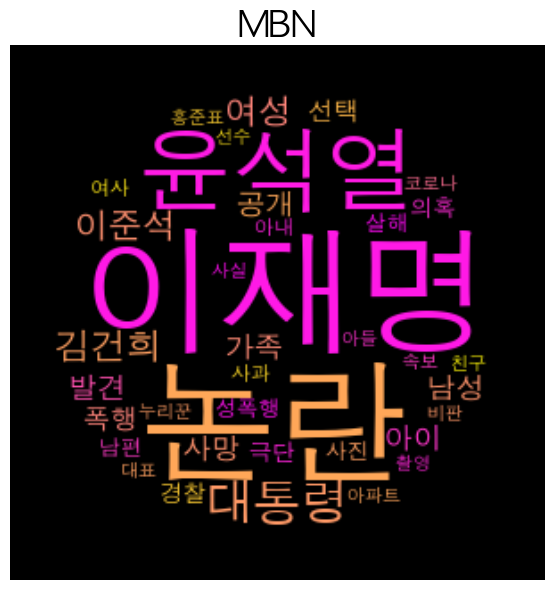

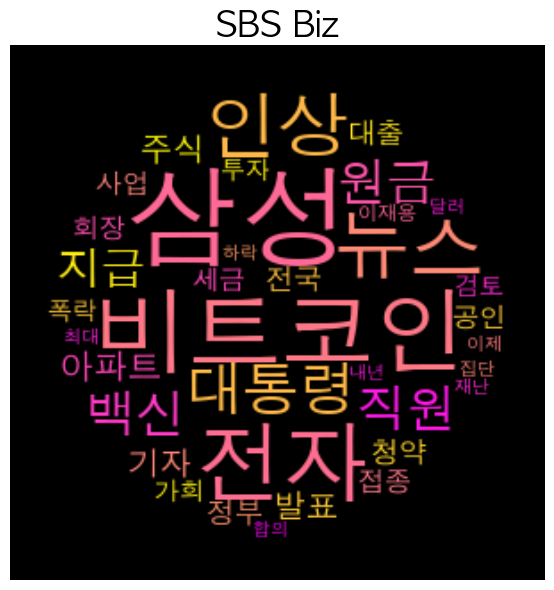

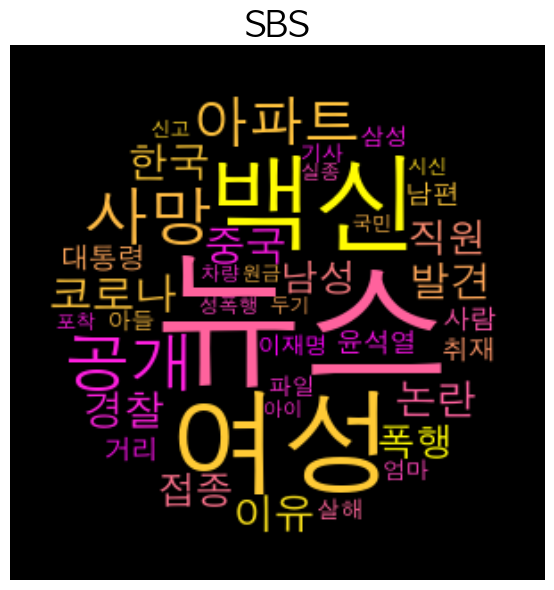

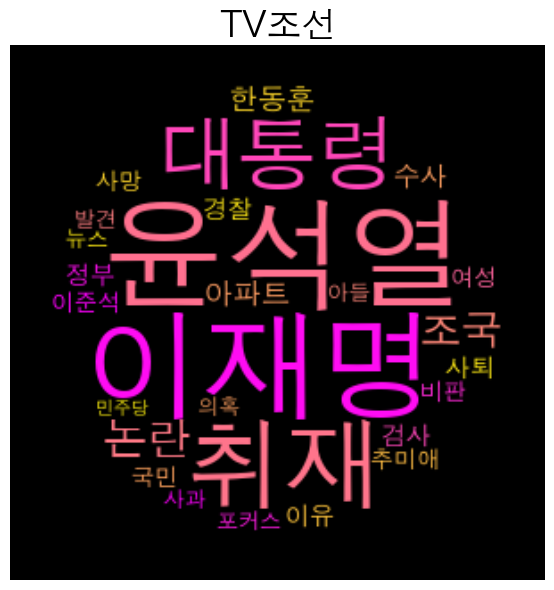

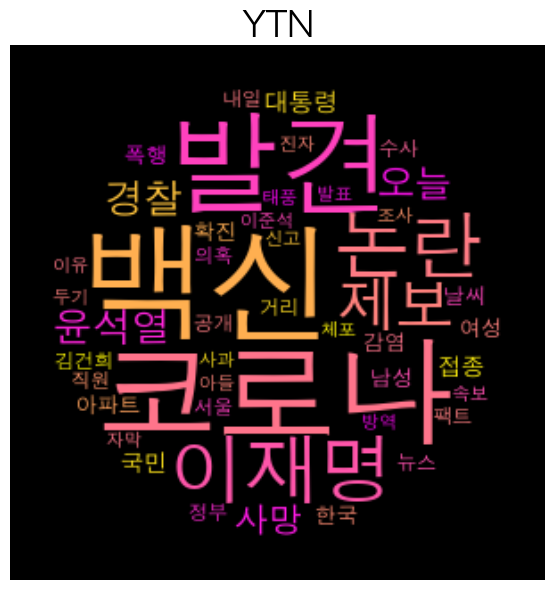

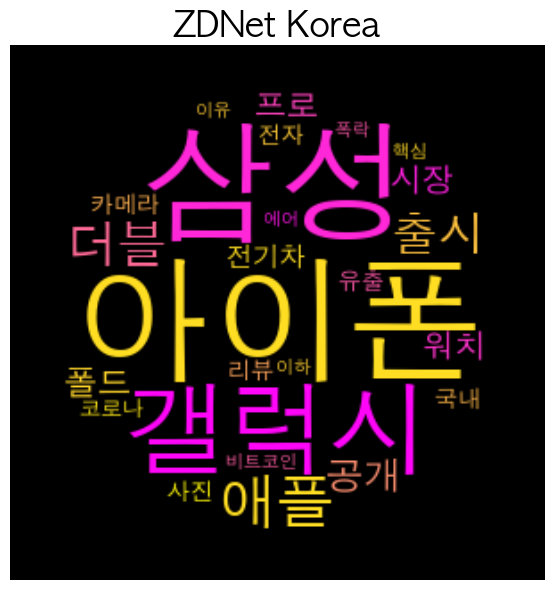

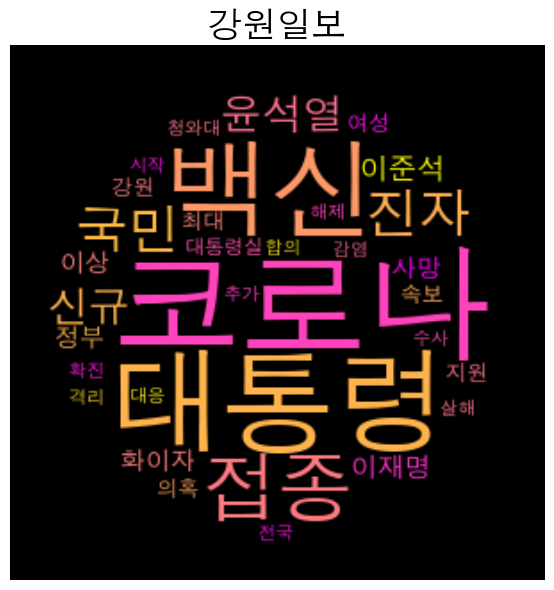

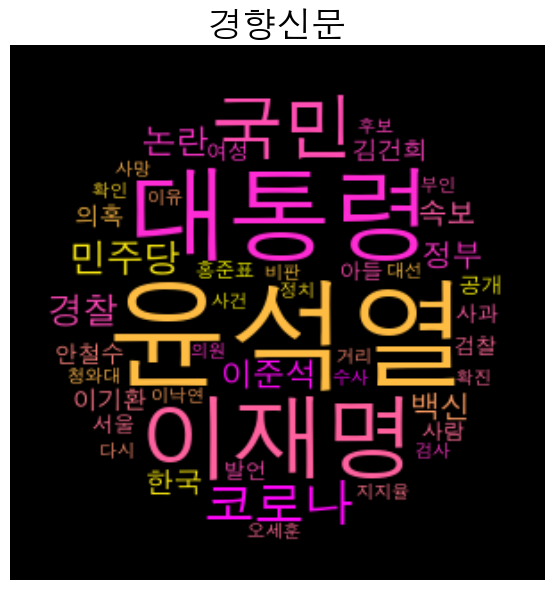

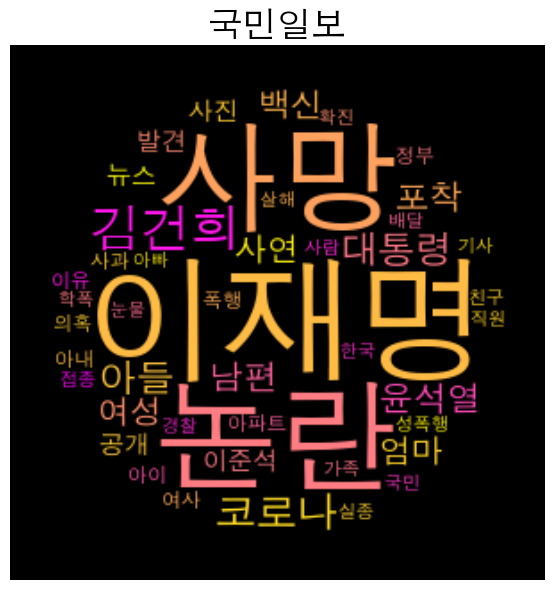

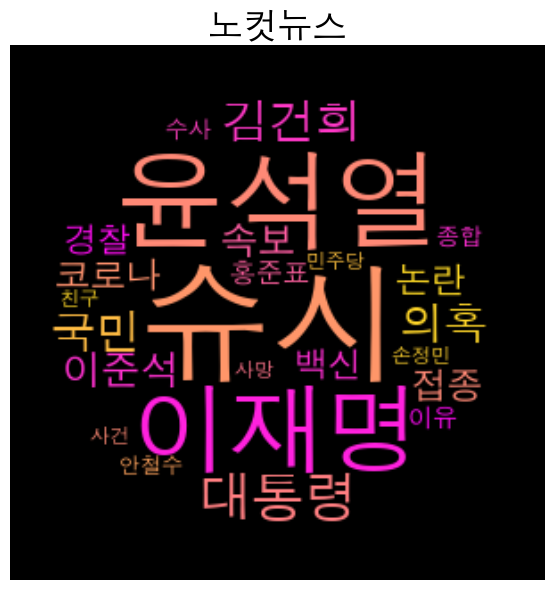

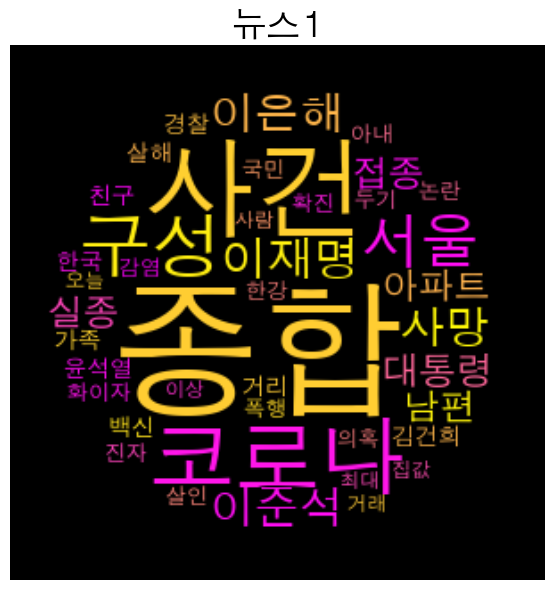

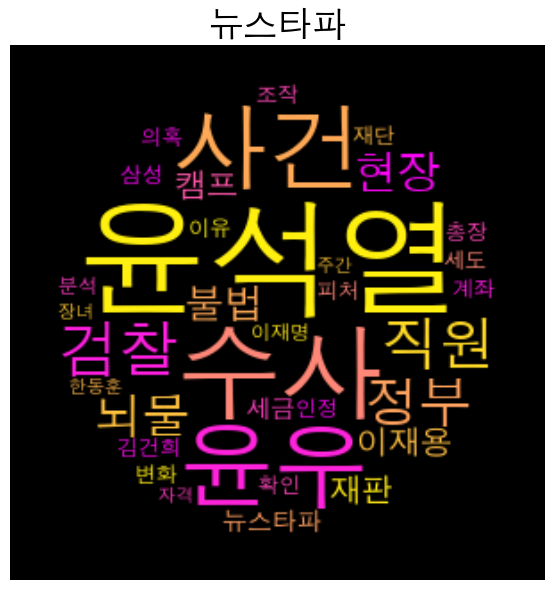

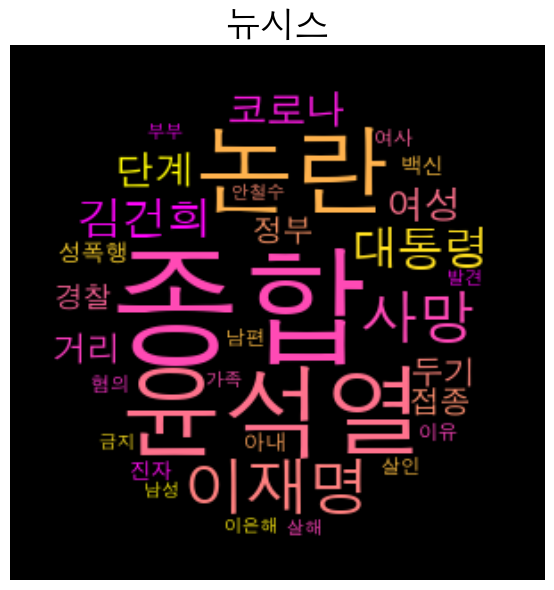

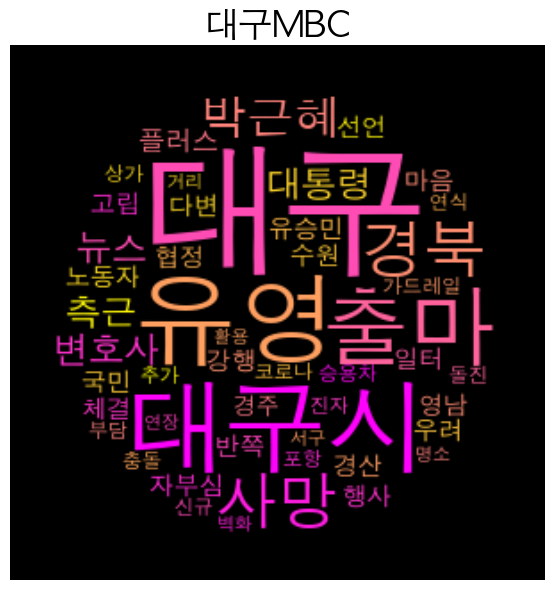

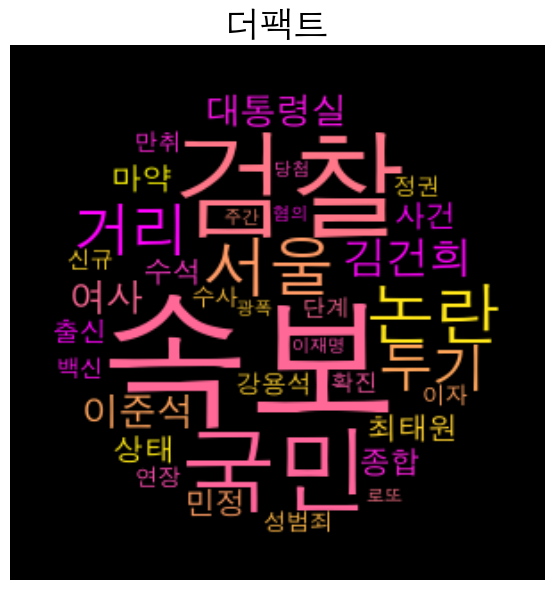

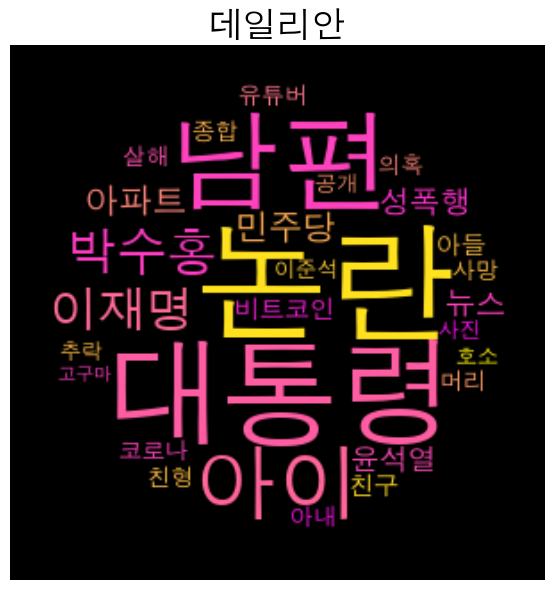

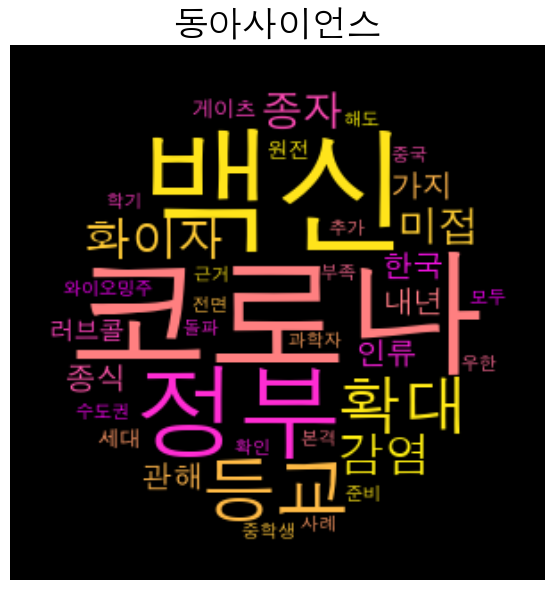

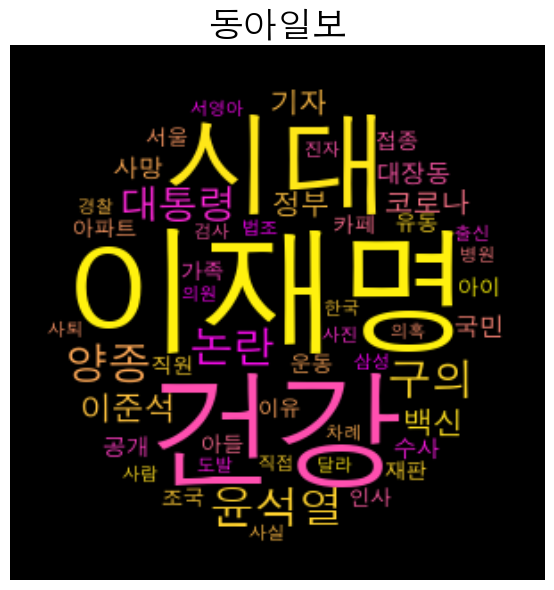

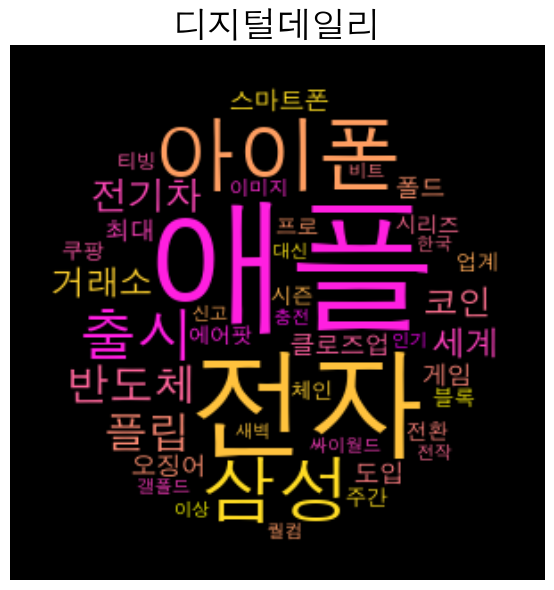

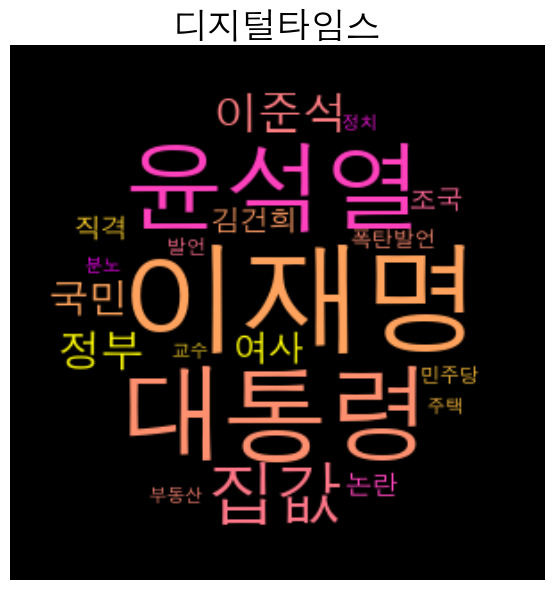

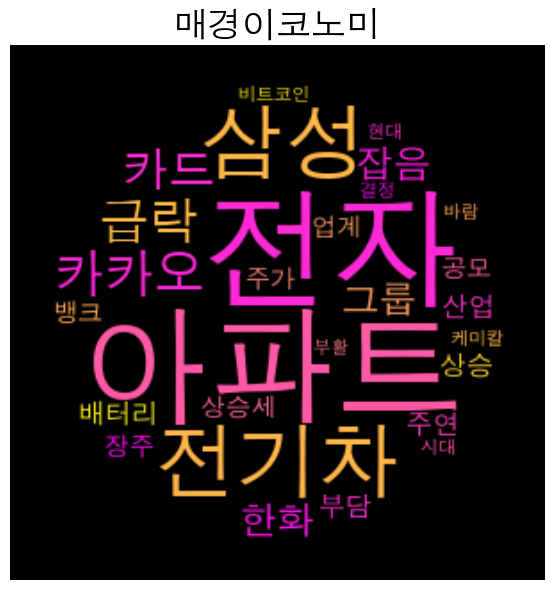

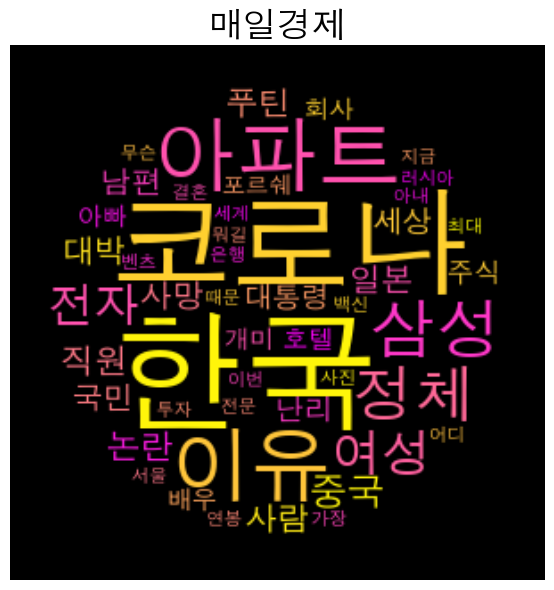

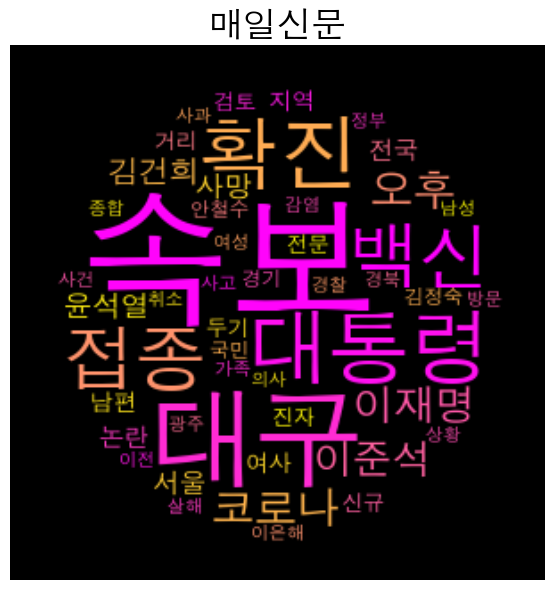

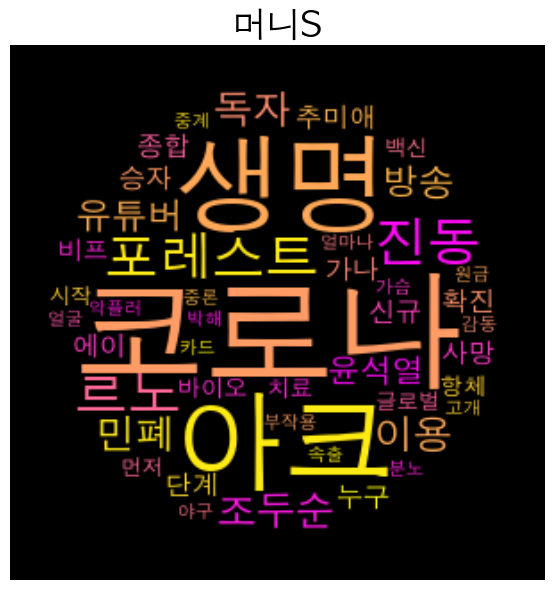

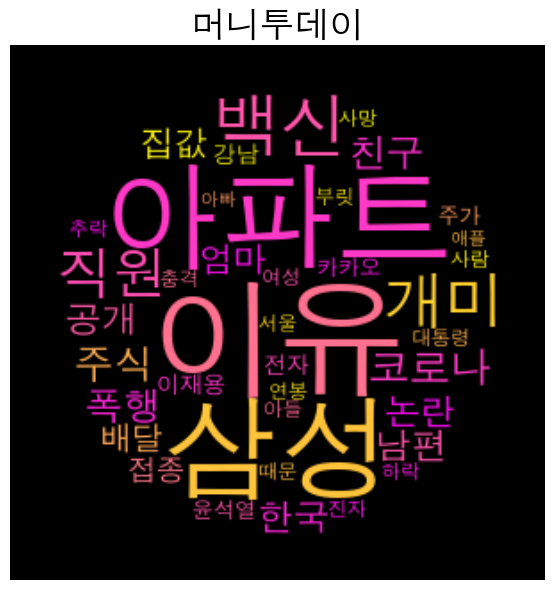

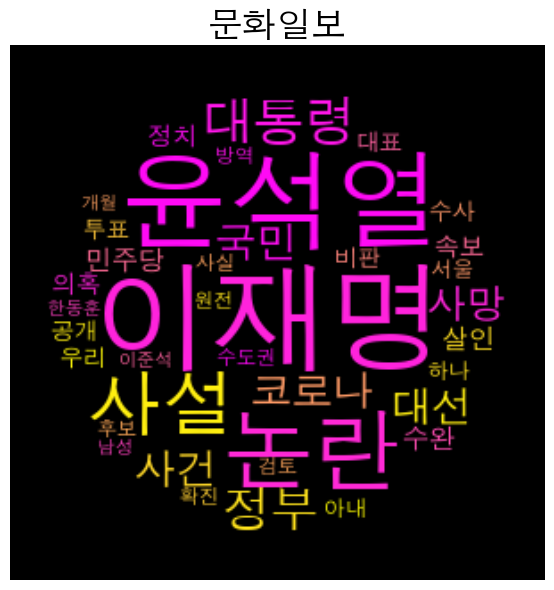

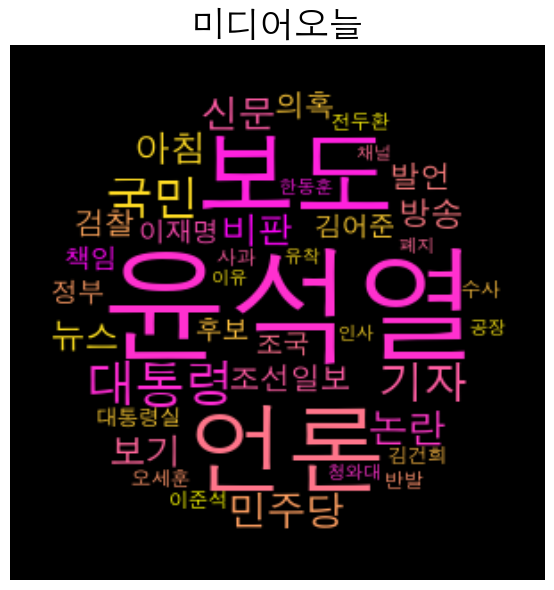

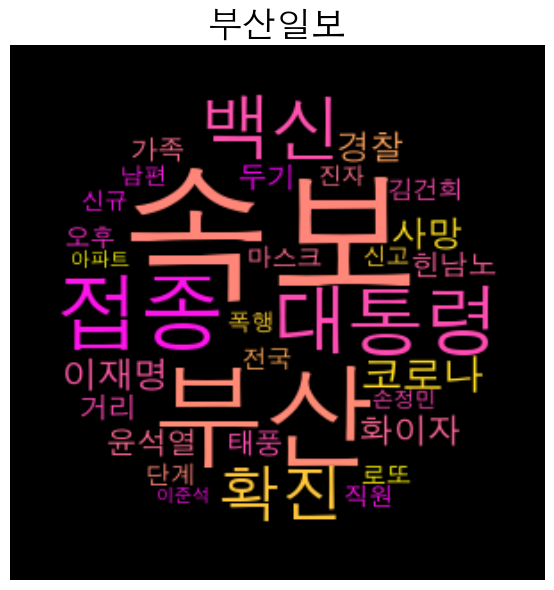

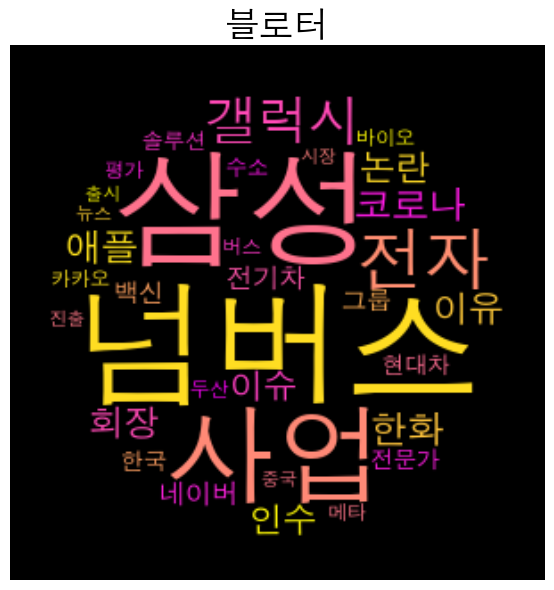

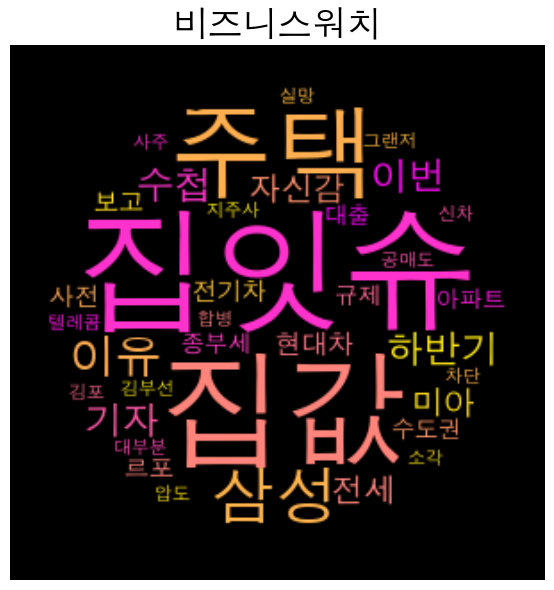

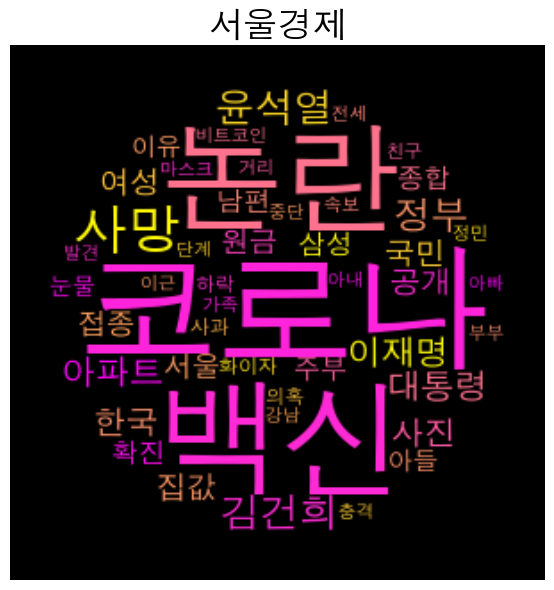

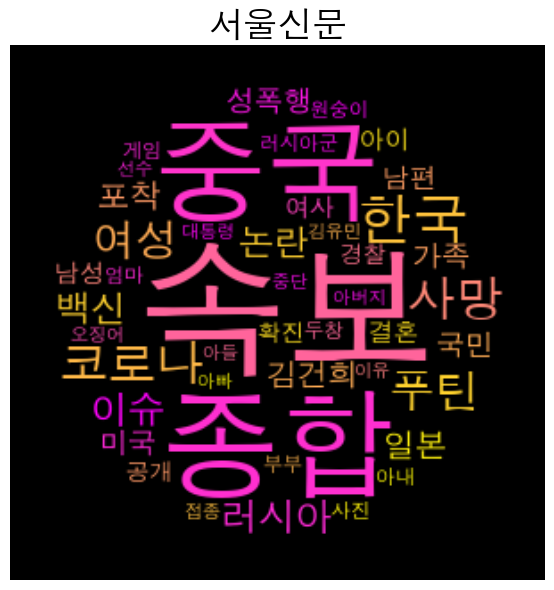

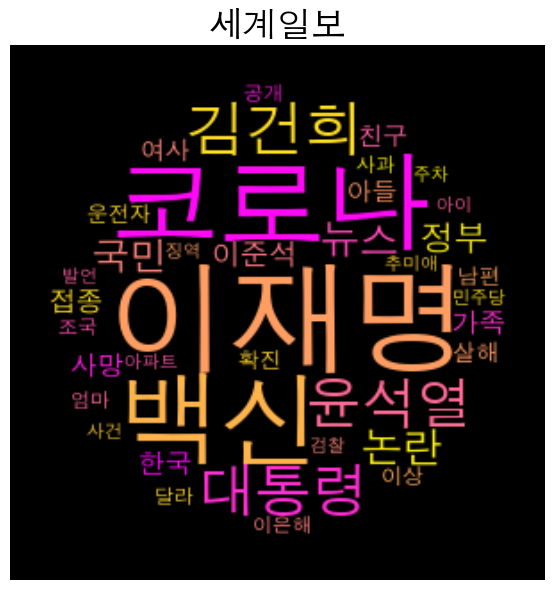

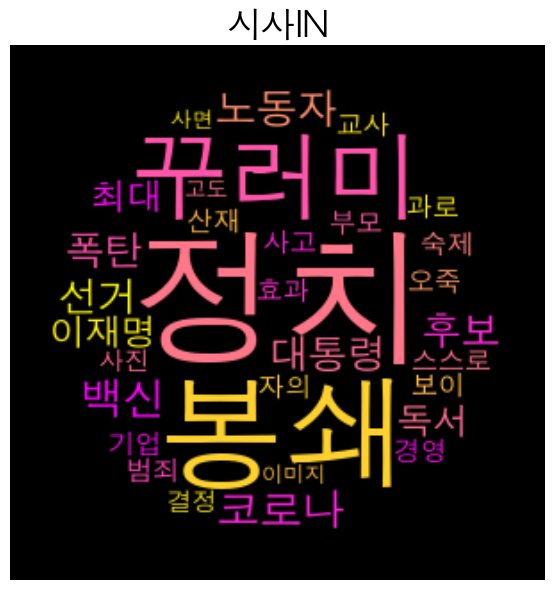

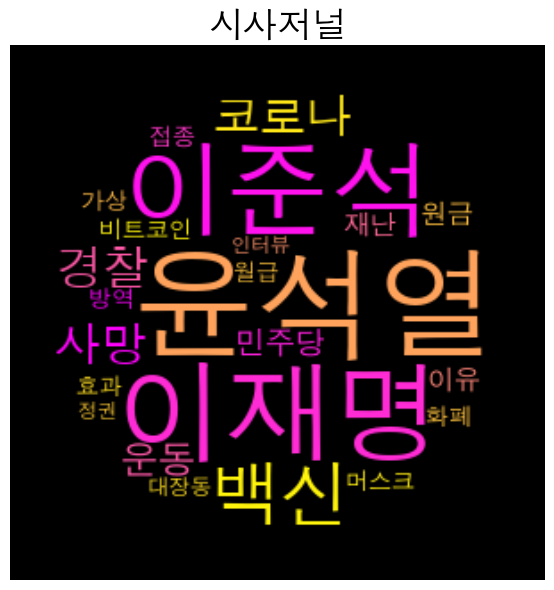

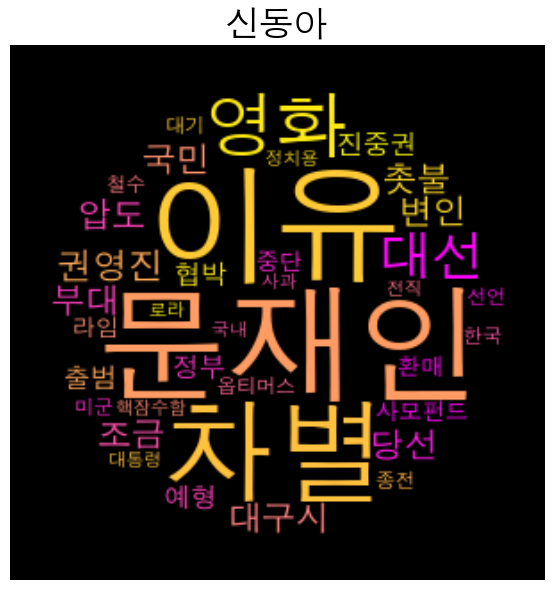

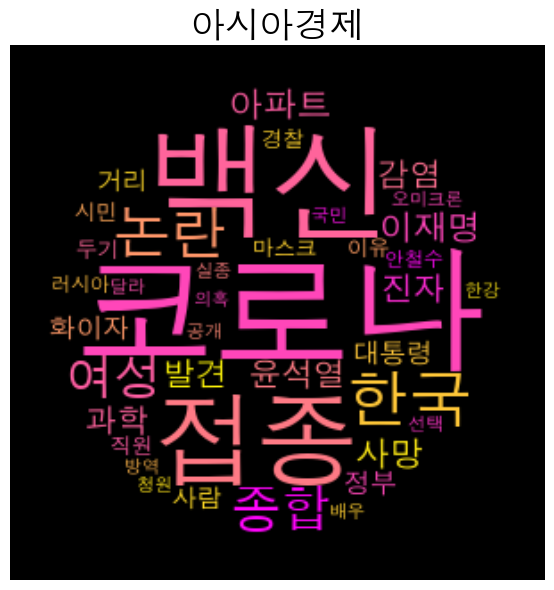

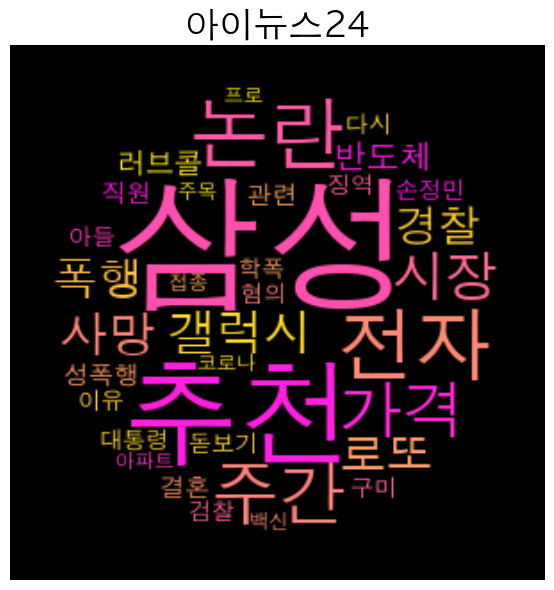

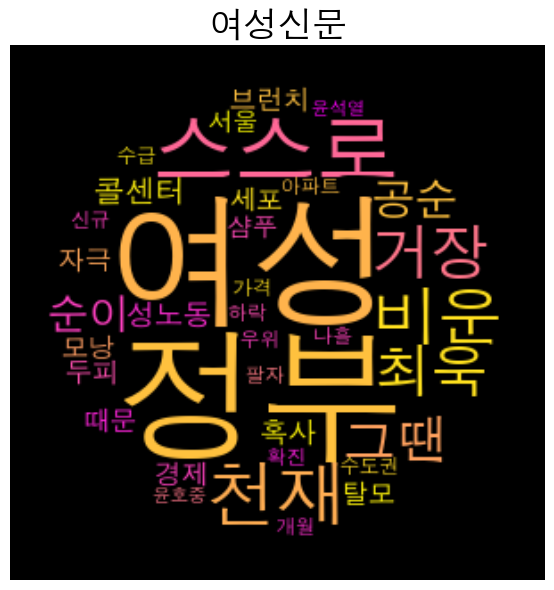

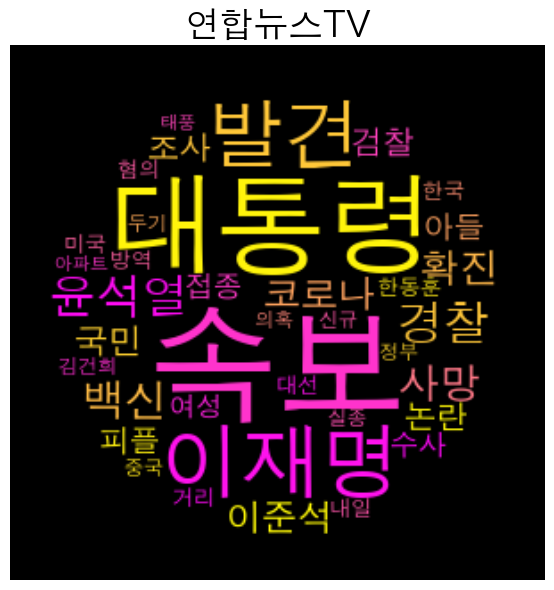

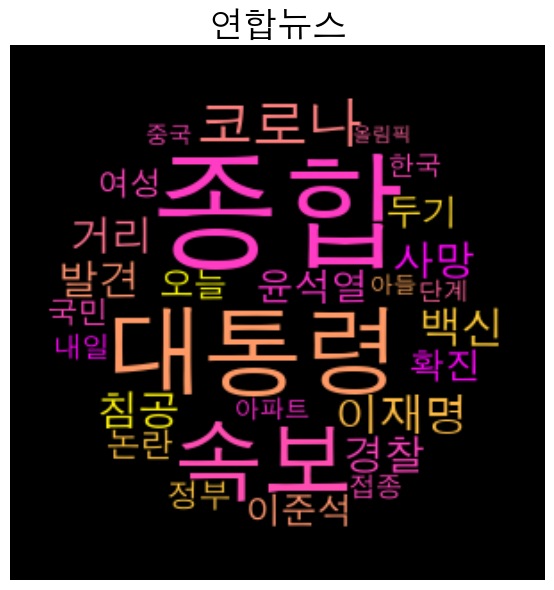

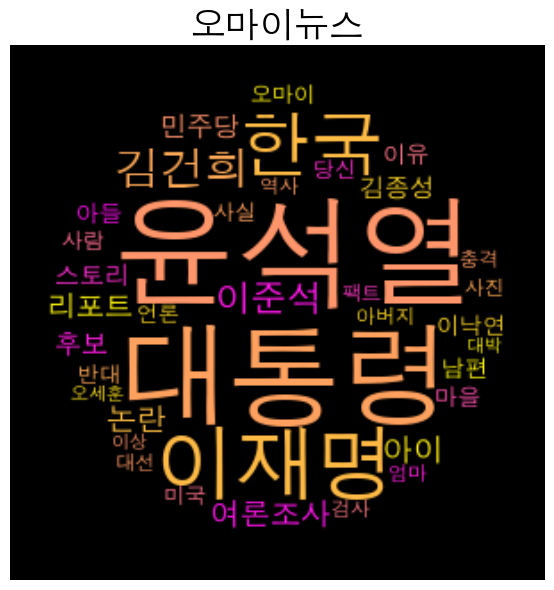

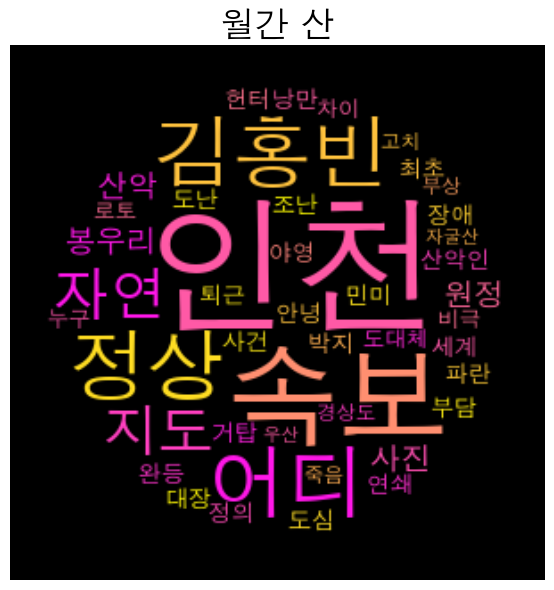

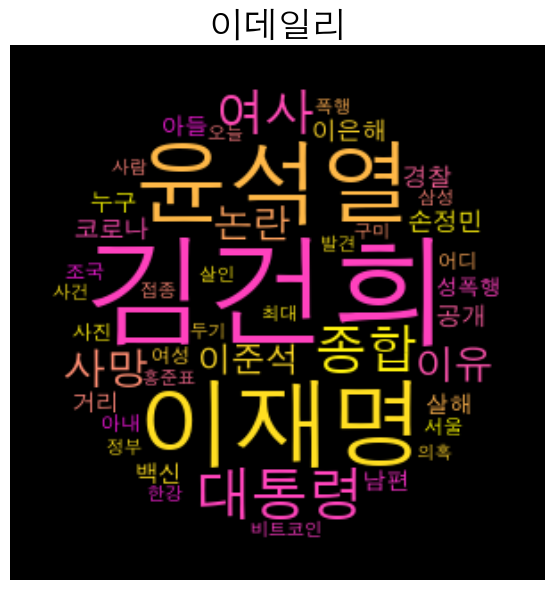

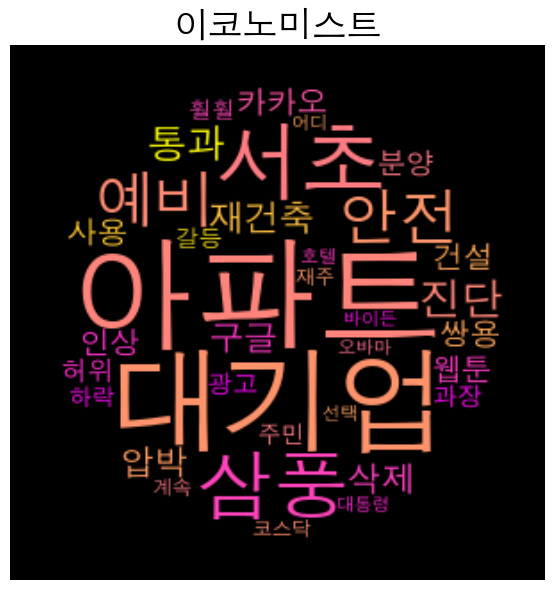

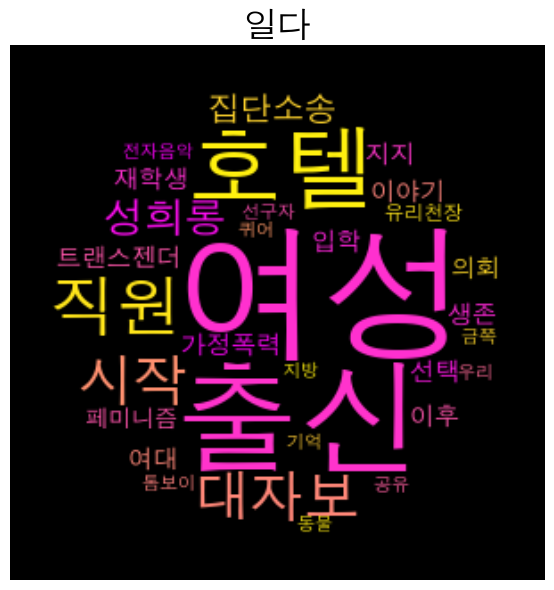

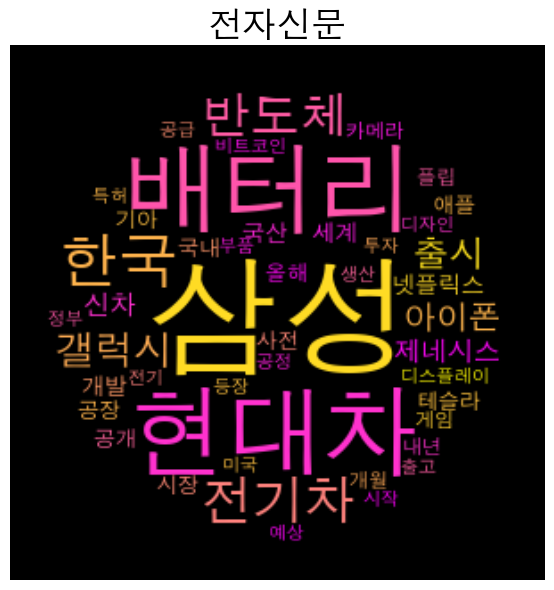

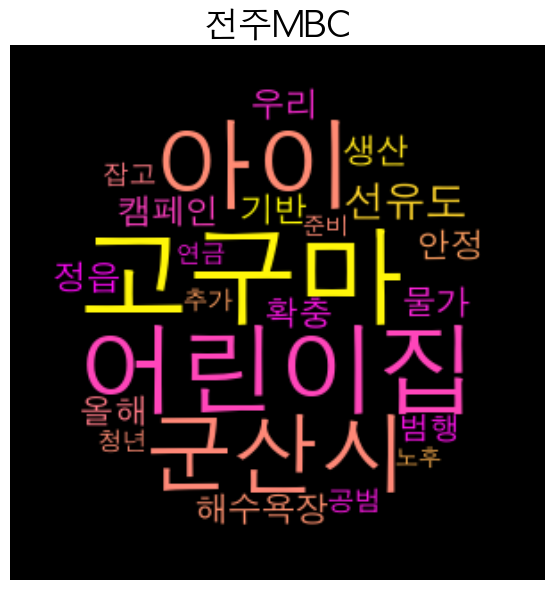

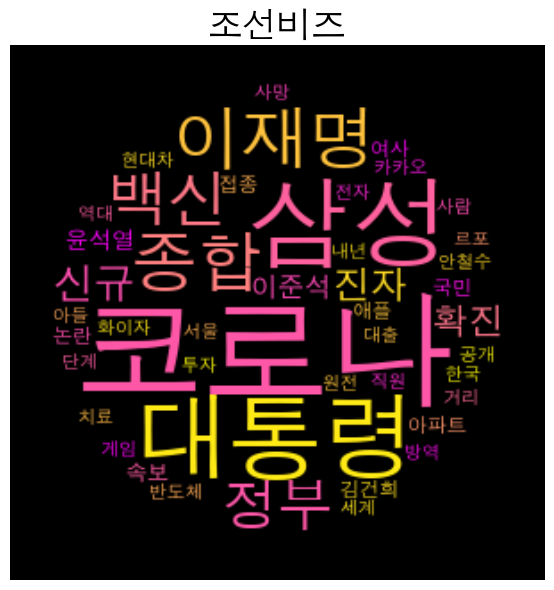

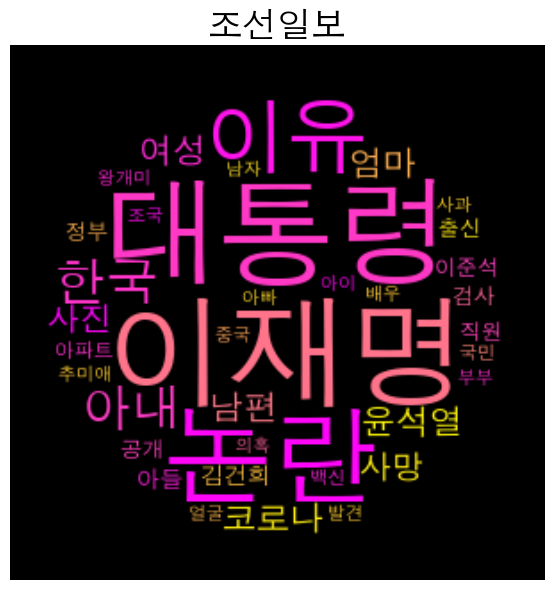

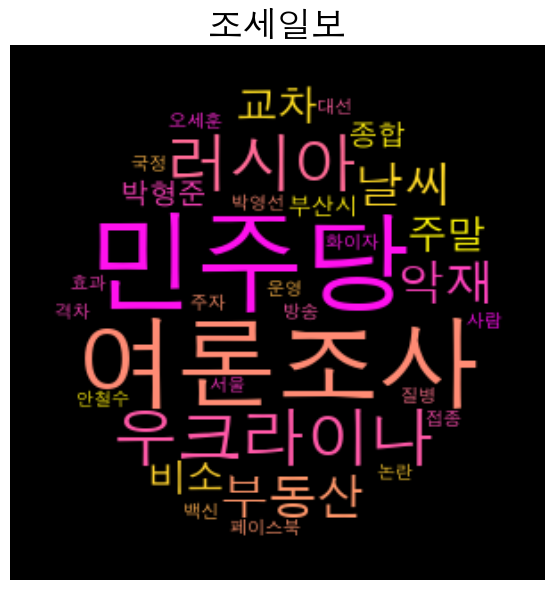

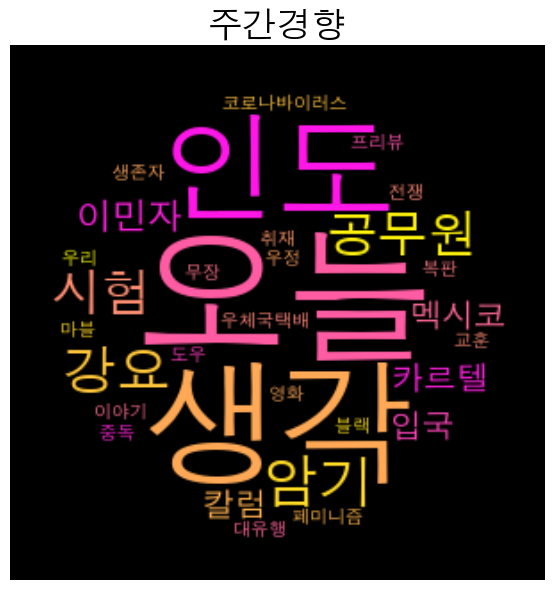

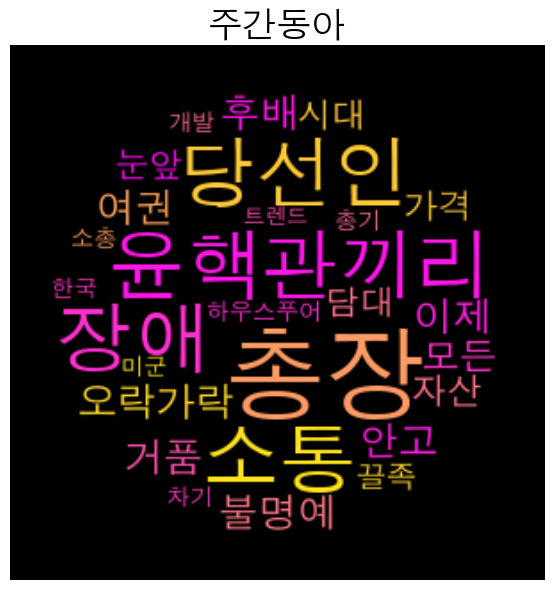

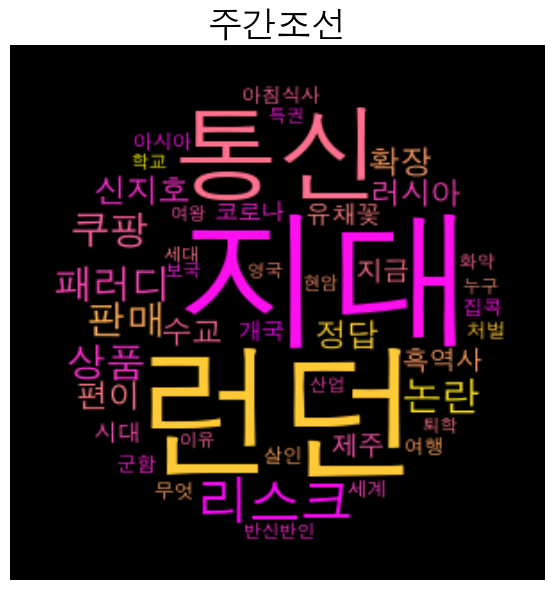

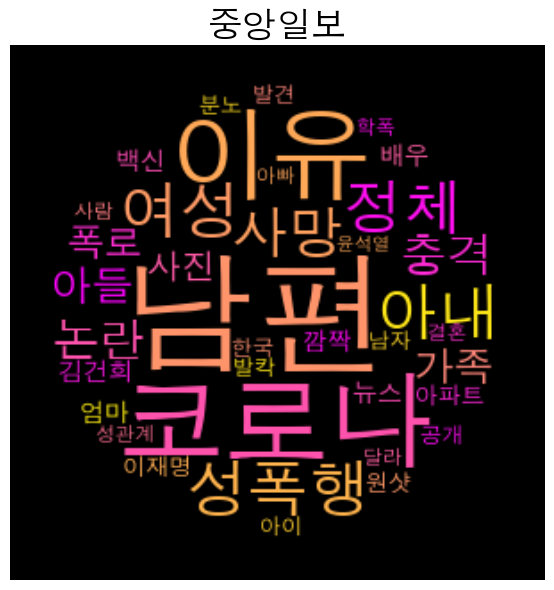

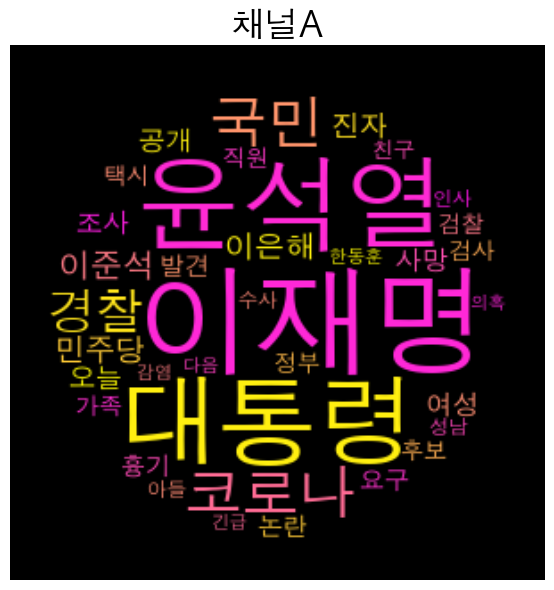

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [65]:
for news_brand in news_brands:
    content_array=df.loc[:,[i for i in df.columns if i.startswith(news_brand)]].fillna('').to_numpy()
    content_str=''.join(list(content_array.reshape(-1)))

    text = content_str
    okt = Okt()
    # okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
    sentences_tag = []
    sentences_tag = okt.pos(text) 

    noun_list = []


    # tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
    for word, tag in sentences_tag:
        if tag in ['Noun']: 
            noun_list.append(word)


    # 가장 많이 나온 단어부터 40개를 저장한다.
    counts = Counter(noun_list)
    tags = counts.most_common() 
    tags = [i for i in tags if len(i[0])!=1 if i[0] not in ['단독','영상']]
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)

    wc = WordCloud(background_color="black",
                repeat=False,
                mask=mask, 
                min_font_size=10,
                prefer_horizontal=True,
                colormap = 'spring',
                font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf")


    wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(12,6),dpi=100)
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"{news_brand}",fontsize=25,fontweight='bold')
    plt.tight_layout()
    plt.show()

In [67]:

news_brand

'코리아중앙데일리'